In [1]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)): 
  ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
def batch_selector(x,y,loss,batch_size,mode="random"):
    if(mode=="random"):
        indices=np.random.choice(len(x),batch_size)
        return(x[indices],y[indices],indices)
    pp=loss.copy()**3#1.0/(0.0001+loss.copy())
    k=sum(pp<0)
    if(k!=0):
        h=k/len(pp)
        pp=pp/(sum(pp[pp<0]))*h
    pp[pp<0]=1/len(pp)
    #print(sum(p))
    #print(np.array(p))
    #print(batch_size)
    indices=np.random.choice(len(pp),batch_size,pp.tolist())
    return(x[indices],y[indices],indices)
    

In [5]:
import tensorflow as tf

In [6]:
x = tf.placeholder(tf.float32, [None, 784])

In [7]:
W = tf.Variable(tf.random_normal([784, 64]))
b = tf.Variable(tf.ones([64]))
y1 = tf.nn.sigmoid(tf.matmul(x, W) + b)
W1 = tf.Variable(tf.random_normal([64, 10]))
b1 = tf.Variable(tf.ones([10]))
y = tf.nn.softmax(tf.matmul(y1, W1) + b1)
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy1 = (-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
cross_entropy=tf.reduce_mean(cross_entropy1)
train_step = tf.train.GradientDescentOptimizer(1.0).minimize(cross_entropy)

In [8]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_sum(tf.cast(correct_prediction, tf.float32))

In [9]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
batch_size=100;p=np.array([-10.0]*len(mnist.train.labels));accumulator2=[]

In [10]:
print(p.shape)

(55000,)


In [11]:
aa0,bb0=sess.run([y1,y], feed_dict={x: mnist.train.images, y_: mnist.train.labels})
daatrain=[];dbbtrain=[];acctrain=[]
for _ in range(100):
    batch_xs, batch_ys,indices = batch_selector(mnist.train.images,mnist.train.labels,p,batch_size,'random')
    sess.run([train_step], feed_dict={x: batch_xs, y_: batch_ys})
    aa,bb,acc=sess.run([y1,y,accuracy], feed_dict={x: mnist.train.images, y_: mnist.train.labels})
    daa=np.sum([abs(xx)>0.5 for xx in aa-aa0]);dbb=np.sum([abs(xx)>0.5 for xx in bb-bb0])
    print(acc)
    daatrain=daatrain+[daa]
    dbbtrain=dbbtrain+[dbb]
    acctrain=acctrain+[acc]
    print(len(daatrain))
    aa0=aa;bb0=bb
    #if _%10==0:
        #accumulator2=accumulator2+[sess.run(cross_entropy, feed_dict={x: mnist.train.images, y_: mnist.train.labels})]

4976.0
1
6617.0
2
7475.0
3
10345.0
4
11155.0
5
13860.0
6
15342.0
7
16072.0
8
17819.0
9
19211.0
10
20260.0
11
21467.0
12
21157.0
13
23067.0
14
24386.0
15
24523.0
16
26282.0
17
26571.0
18
27065.0
19
26060.0
20
28219.0
21
29453.0
22
30042.0
23
30923.0
24
30754.0
25
30286.0
26
31015.0
27
31161.0
28
31542.0
29
33008.0
30
33443.0
31
32449.0
32
32215.0
33
34208.0
34
34343.0
35
34409.0
36
34914.0
37
34661.0
38
34491.0
39
34641.0
40
35709.0
41
36200.0
42
36398.0
43
36610.0
44
35556.0
45
36073.0
46
37143.0
47
36866.0
48
36584.0
49
35899.0
50
37239.0
51
36411.0
52
38026.0
53
37954.0
54
37018.0
55
38456.0
56
37294.0
57
37905.0
58
36655.0
59
35839.0
60
38591.0
61
39244.0
62
38318.0
63
39126.0
64
38510.0
65
39719.0
66
37927.0
67
39764.0
68
39543.0
69
38341.0
70
39230.0
71
39671.0
72
40165.0
73
39935.0
74
39542.0
75
40654.0
76
40352.0
77
40141.0
78
40107.0
79
40327.0
80
40572.0
81
40809.0
82
40610.0
83
40348.0
84
41433.0
85
40037.0
86
40732.0
87
40771.0
88
40392.0
89
41135.0
90
40576.0
91
41504.0
92


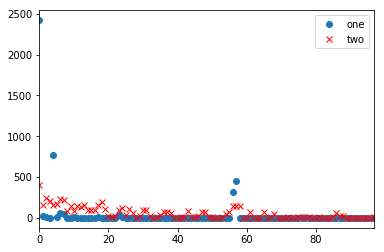

In [16]:


d = {'one' : daatrain[2:],
     'two' : np.array(dbbtrain)[2:]/100}

df = pd.DataFrame(d)

df.plot(style=['o','rx'])
plt.show()

In [19]:
for i in range(len(daatrain)):
    print("firstlayer   :  ",daatrain[i],"  secondlayer   :  ",dbbtrain[i],"  accuracy: ", acctrain[i])

firstlayer   :   29106   secondlayer   :   73234   accuracy:  4976.0
firstlayer   :   1677   secondlayer   :   45767   accuracy:  6617.0
firstlayer   :   2421   secondlayer   :   40199   accuracy:  7475.0
firstlayer   :   25   secondlayer   :   15290   accuracy:  10345.0
firstlayer   :   12   secondlayer   :   24870   accuracy:  11155.0
firstlayer   :   1   secondlayer   :   21156   accuracy:  13860.0
firstlayer   :   768   secondlayer   :   15470   accuracy:  15342.0
firstlayer   :   8   secondlayer   :   16478   accuracy:  16072.0
firstlayer   :   60   secondlayer   :   23664   accuracy:  17819.0
firstlayer   :   52   secondlayer   :   22382   accuracy:  19211.0
firstlayer   :   0   secondlayer   :   8626   accuracy:  20260.0
firstlayer   :   0   secondlayer   :   14924   accuracy:  21467.0
firstlayer   :   7   secondlayer   :   8906   accuracy:  21157.0
firstlayer   :   1   secondlayer   :   15133   accuracy:  23067.0
firstlayer   :   1   secondlayer   :   13522   accuracy:  24386.0

In [ ]:
#same input means.. for last layers also, not only the first layer